### LSE Data Analytics Online Career Accelerator 

# DA301:  Advanced Analytics for Organisational Impact

## Assignment template

### Scenario
You are a data analyst working for Turtle Games, a game manufacturer and retailer. They manufacture and sell their own products, along with sourcing and selling products manufactured by other companies. Their product range includes books, board games, video games and toys. They have a global customer base and have a business objective of improving overall sales performance by utilising customer trends. In particular, Turtle Games wants to understand: 
- how customers accumulate loyalty points (Week 1)
- how useful are remuneration and spending scores data (Week 2)
- can social data (e.g. customer reviews) be used in marketing campaigns (Week 3)
- what is the impact on sales per product (Week 4)
- the reliability of the data (e.g. normal distribution, Skewness, Kurtosis) (Week 5)
- if there is any possible relationship(s) in sales between North America, Europe, and global sales (Week 6).

# Week 1 assignment: Linear regression using Python
The marketing department of Turtle Games prefers Python for data analysis. As you are fluent in Python, they asked you to assist with data analysis of social media data. The marketing department wants to better understand how users accumulate loyalty points. Therefore, you need to investigate the possible relationships between the loyalty points, age, remuneration, and spending scores. Note that you will use this data set in future modules as well and it is, therefore, strongly encouraged to first clean the data as per provided guidelines and then save a copy of the clean data for future use.

## Instructions
1. Load and explore the data.
    1. Create a new DataFrame (e.g. reviews).
    2. Sense-check the DataFrame.
    3. Determine if there are any missing values in the DataFrame.
    4. Create a summary of the descriptive statistics.
2. Remove redundant columns (`language` and `platform`).
3. Change column headings to names that are easier to reference (e.g. `renumeration` and `spending_score`).
4. Save a copy of the clean DataFrame as a CSV file. Import the file to sense-check.
5. Use linear regression and the `statsmodels` functions to evaluate possible linear relationships between loyalty points and age/renumeration/spending scores to determine whether these can be used to predict the loyalty points.
    1. Specify the independent and dependent variables.
    2. Create the OLS model.
    3. Extract the estimated parameters, standard errors, and predicted values.
    4. Generate the regression table based on the X coefficient and constant values.
    5. Plot the linear regression and add a regression line.
6. Include your insights and observations.

## 1. Load and explore the data

In [1]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm 
import statsmodels.stats.api as sms
from statsmodels.formula.api import ols

import sklearn
from sklearn import linear_model
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from statsmodels.formula.api import ols

import warnings  
warnings.filterwarnings('ignore')  

In [20]:
# Load the CSV file(s) as reviews.
reviews = pd.read_csv('turtle_reviews.csv')

# View the DataFrame.
reviews.head()

,gender,age,remuneration (k£),spending_score (1-100),loyalty_points,education,language,platform,product,review,summary
0,Male,18,12.30,39,210,graduate,EN,Web,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,Male,23,12.30,81,524,graduate,EN,Web,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,Female,22,13.12,6,40,graduate,EN,Web,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Female,25,13.12,77,562,graduate,EN,Web,263,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,Female,33,13.94,40,366,graduate,EN,Web,291,As my review of GF9's previous screens these w...,Money trap


In [3]:
# Any missing values?
reviews.isna().sum()

gender                    0
age                       0
remuneration (k£)         0
spending_score (1-100)    0
loyalty_points            0
education                 0
language                  0
platform                  0
product                   0
review                    0
summary                   0
dtype: int64

In [5]:
# Explore the metadata.
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   gender                  2000 non-null   object 
 1   age                     2000 non-null   int64  
 2   remuneration (k£)       2000 non-null   float64
 3   spending_score (1-100)  2000 non-null   int64  
 4   loyalty_points          2000 non-null   int64  
 5   education               2000 non-null   object 
 6   language                2000 non-null   object 
 7   platform                2000 non-null   object 
 8   product                 2000 non-null   int64  
 9   review                  2000 non-null   object 
 10  summary                 2000 non-null   object 
dtypes: float64(1), int64(4), object(6)
memory usage: 172.0+ KB


In [7]:
# Explore the data types
reviews.dtypes

gender                     object
age                         int64
remuneration (k£)         float64
spending_score (1-100)      int64
loyalty_points              int64
education                  object
language                   object
platform                   object
product                     int64
review                     object
summary                    object
dtype: object

In [9]:
# Descriptive statistics.
reviews.describe()

,age,remuneration (k£),spending_score (1-100),loyalty_points,product
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,39.495000,48.079060,50.000000,1578.032000,4320.521500
std,13.573212,23.123984,26.094702,1283.239705,3148.938839
min,17.000000,12.300000,1.000000,25.000000,107.000000
25%,29.000000,30.340000,32.000000,772.000000,1589.250000
50%,38.000000,47.150000,50.000000,1276.000000,3624.000000
75%,49.000000,63.960000,73.000000,1751.250000,6654.000000
max,72.000000,112.340000,99.000000,6847.000000,11086.000000


## 2. Drop columns

In [21]:
# Drop unnecessary columns.
reviews.drop(columns=['language', 'platform'], axis=1, inplace=True)

# View column names.
list(reviews)

['gender',
 'age',
 'remuneration (k£)',
 'spending_score (1-100)',
 'loyalty_points',
 'education',
 'product',
 'review',
 'summary']

## 3. Rename columns

In [26]:
# Rename the column headers.
reviews.rename(columns={'remuneration (k£)': 'remuneration', 'spending_score (1-100)': 'spending_score'}, inplace=True)

# View column names.
list(reviews)

['gender',
 'age',
 'remuneration',
 'spending_score',
 'loyalty_points',
 'education',
 'product',
 'review',
 'summary']

## 4. Save the DataFrame as a CSV file

In [27]:
# Create a CSV file as output.
reviews.to_csv('reviews.csv')

In [113]:
# Import new CSV file with Pandas.
reviews = pd.read_csv('reviews.csv')

# View DataFrame.
print(reviews.shape)
reviews.head()

(2000, 10)


,Unnamed: 0,gender,age,remuneration,spending_score,loyalty_points,education,product,review,summary
0,0,Male,18,12.30,39,210,graduate,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,1,Male,23,12.30,81,524,graduate,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,2,Female,22,13.12,6,40,graduate,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,3,Female,25,13.12,77,562,graduate,263,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,4,Female,33,13.94,40,366,graduate,291,As my review of GF9's previous screens these w...,Money trap


## 5. Linear regression

### 5a) spending vs loyalty

In [139]:
# Independent variable.
X = reviews["spending_score"]

# Dependent variable.
y = reviews["loyalty_points"]

# OLS model
f = 'y ~ X'
model_sl = ols(f, data = reviews).fit()

# View the output.
model_sl.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.452
Model:                            OLS   Adj. R-squared:                  0.452
Method:                 Least Squares   F-statistic:                     1648.
Date:                Wed, 07 Jun 2023   Prob (F-statistic):          2.92e-263
Time:                        23:49:24   Log-Likelihood:                -16550.
No. Observations:                2000   AIC:                         3.310e+04
Df Residuals:                    1998   BIC:                         3.312e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -75.0527     45.931     -1.634      0.102    -165.129      15.024
X             33.0617      0.814     40.595      0.000      31.464      34.659
==============================================================================
Omnibus:                      126.554   Durbin-Watson:                   1.191
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              260.528
Skew:                           0.422   Prob(JB):                     2.67e-57
Kurtosis:                       4.554   Cond. No.                         122.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [140]:
# Extract the estimated parameters.
print("Parameters:\n", model_sl.params)

# Extract the standard errors.
print("Standard errors:\n", model_sl.bse)

# Extract the predicted values.
print("Predicted values:\n", model_sl.predict())

Parameters:
 Intercept   -75.052663
X            33.061693
dtype: float64
Standard errors:
 Intercept    45.930554
X             0.814419
dtype: float64
Predicted values:
 [1214.35337415 2602.94449102  123.31749662 ... 2933.56142361  453.93442921
  189.44088314]


In [141]:
# Set the X coefficient and the constant to generate the regression table.
y_sl_pred = -75.0526 + 33.0617 * X

# View the output.
y_sl_pred

0       1214.3537
1       2602.9451
2        123.3176
3       2470.6983
4       1247.4154
          ...    
1995    2206.2047
1996     189.4410
1997    2933.5621
1998     453.9346
1999     189.4410
Name: spending_score, Length: 2000, dtype: float64

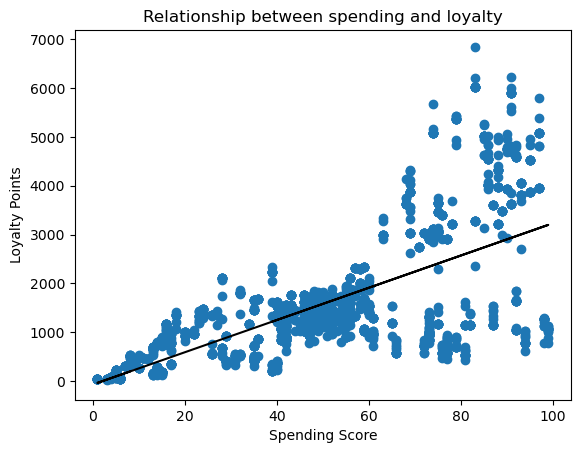

In [142]:
# Plot the graph with a regression line.
# Plot the data points.
plt.scatter(X, y)

# Plot the regression line.
plt.plot(X, y_sl_pred, color='black')

# Set Labels.
plt.title("Relationship between spending and loyalty")
plt.xlabel("Spending Score")
plt.ylabel("Loyalty Points")

plt.show()

### 5b) remuneration vs loyalty

In [129]:
# Independent variable.
X = reviews["remuneration"]

# Dependent variable.
y = reviews["loyalty_points"]

# OLS model
f = 'y ~ X'
model_rl = ols(f, data = reviews).fit()

# View the output.
model_rl.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.380
Model:                            OLS   Adj. R-squared:                  0.379
Method:                 Least Squares   F-statistic:                     1222.
Date:                Wed, 07 Jun 2023   Prob (F-statistic):          2.43e-209
Time:                        23:45:49   Log-Likelihood:                -16674.
No. Observations:                2000   AIC:                         3.335e+04
Df Residuals:                    1998   BIC:                         3.336e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -65.6865     52.171     -1.259      0.208    -168.001      36.628
X             34.1878      0.978     34.960      0.000      32.270      36.106
==============================================================================
Omnibus:                       21.285   Durbin-Watson:                   3.622
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               31.715
Skew:                           0.089   Prob(JB):                     1.30e-07
Kurtosis:                       3.590   Cond. No.                         123.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [130]:
# Extract the estimated parameters.
print("Parameters:\n", model_rl.params)

# Extract the standard errors.
print("Standard errors:\n", model_rl.bse)

# Extract the predicted values.
print("Predicted values:\n", model_rl.predict())

Parameters:
 Intercept   -65.686513
X            34.187825
dtype: float64
Standard errors:
 Intercept    52.170717
X             0.977925
dtype: float64
Predicted values:
 [ 354.82374068  354.82374068  382.85775758 ... 3102.15739671 3298.39551499
 3102.15739671]


In [131]:
# Set the X coefficient and the constant to generate the regression table.
y_rl_pred =  -65.6865 +  34.1878 * X

# View the output.
y_rl_pred

0        354.823440
1        354.823440
2        382.857436
3        382.857436
4        410.891432
           ...     
1995    2821.815088
1996    3102.155048
1997    3102.155048
1998    3298.393020
1999    3102.155048
Name: remuneration, Length: 2000, dtype: float64

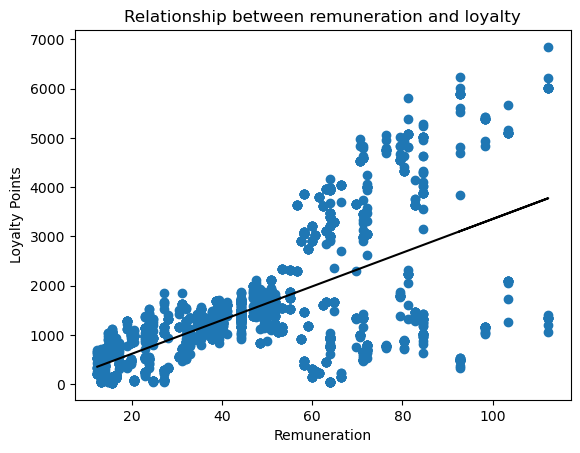

In [133]:
# Plot graph with regression line.
# Plot the data points.
plt.scatter(X, y)

# Plot the regression line.
plt.plot(X, y_rl_pred, color='black')

# Set Labels.
plt.title("Relationship between remuneration and loyalty")
plt.xlabel("Remuneration")
plt.ylabel("Loyalty Points")

plt.show()

### 5c) age vs loyalty

In [122]:
# Independent variable.
X = reviews["age"]

# Dependent variable.
y = reviews["loyalty_points"]

# OLS model
f = 'y ~ X'
model_al = ols(f, data = reviews).fit()

# View the output.
model_al.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     3.606
Date:                Wed, 07 Jun 2023   Prob (F-statistic):             0.0577
Time:                        23:39:01   Log-Likelihood:                -17150.
No. Observations:                2000   AIC:                         3.430e+04
Df Residuals:                    1998   BIC:                         3.431e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1736.5177     88.249     19.678      0.000    1563.449    1909.587
X             -4.0128      2.113     -1.899      0.058      -8.157       0.131
==============================================================================
Omnibus:                      481.477   Durbin-Watson:                   2.277
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              937.734
Skew:                           1.449   Prob(JB):                    2.36e-204
Kurtosis:                       4.688   Cond. No.                         129.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [123]:
# Extract the estimated parameters.
print("Parameters:\n", model_al.params)

# Extract the standard errors.
print("Standard errors:\n", model_al.bse)

# Extract the predicted values.
print("Predicted values:\n", model_al.predict())

Parameters:
 Intercept    1736.517739
X              -4.012805
dtype: float64
Standard errors:
 Intercept    88.248731
X             2.113177
dtype: float64
Predicted values:
 [1664.2872467  1644.22322095 1648.2360261  ... 1600.0823643  1600.0823643
 1608.1079746 ]


In [124]:
# Set the X coefficient and the constant to generate the regression table.
y_al_pred = 1736.5177 + -4.01281 * X

# View the output.
y_al_pred

0       1664.28712
1       1644.22307
2       1648.23588
3       1636.19745
4       1604.09497
           ...    
1995    1588.04373
1996    1563.96687
1997    1600.08216
1998    1600.08216
1999    1608.10778
Name: age, Length: 2000, dtype: float64

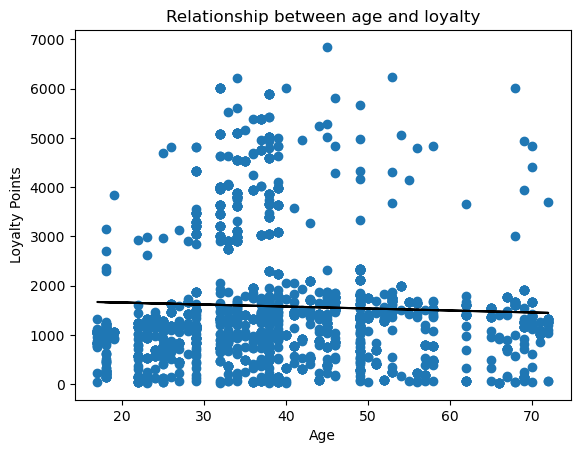

In [127]:
# Plot the graph with a regression line.
# Plot the data points.
plt.scatter(X, y)

# Plot the regression line.
plt.plot(X, y_al_pred, color='black')

# Set Labels.
plt.title("Relationship between age and loyalty")
plt.xlabel("Age")
plt.ylabel("Loyalty Points")

plt.show()

## (Extra) Testing multiple regression with spending and remuneration

In [190]:
# Independent variable.
X = reviews[["spending_score", "remuneration"]]

# Dependent variable.
y = reviews["loyalty_points"]

In [191]:
# Specify the model.
mlr_sr = linear_model.LinearRegression()  

# Fit the model.
mlr_sr.fit(X, y)

LinearRegression()

In [192]:
# Call the predictions for X (array).
mlr_sr.predict(X) 

array([ 4.57831319e-01,  1.38195101e+03, -1.05713790e+03, ...,
        4.44147048e+03,  2.16956070e+03,  1.71137682e+03])

In [193]:
# Print the R-squared value.
print("R-squared: ", multi.score(X,y))  

# Print the intercept.
print("Intercept: ", multi.intercept_) 

# Print the coefficients.
print("Coefficients:")  

# Map a similar index of multiple containers (to be used as a single entity).
list(zip(X, multi.coef_))  

R-squared:  0.8269134701989259
Intercept:  -1700.305097014437
Coefficients:


[('spending_score', 32.89269468782097), ('remuneration', 33.97949882180285)]

### Training and testing subsets with MLR

In [194]:
# Create train and test data sets.
x_train, x_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=6)

In [195]:
# Training the model using the 'statsmodel' OLS library.
# Fit the model with the added constant.
model = sm.OLS(y_train, sm.add_constant(x_train)).fit()

# Set the predicted response vector.
Y_pred = model.predict(sm.add_constant(x_test)) 

# Call a summary of the model.
print_model = model.summary()

# Print the summary.
print(print_model)  

                            OLS Regression Results                            
Dep. Variable:         loyalty_points   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     3716.
Date:                Thu, 08 Jun 2023   Prob (F-statistic):               0.00
Time:                        00:10:19   Log-Likelihood:                -12327.
No. Observations:                1600   AIC:                         2.466e+04
Df Residuals:                    1597   BIC:                         2.468e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const          -1706.4781     40.548    -42.

### Run a regression test

In [196]:
# Specify the model.
mlr = LinearRegression()  

# Fit the model. We can only fit the model with the training data set.
mlr.fit(x_train, y_train) 

LinearRegression()

In [197]:
# Call the predictions for X in the train set.
y_pred_mlr = mlr.predict(x_train)  

# Print the predictions.
print("Prediction for train set: {}".format(y_pred_mlr)) 

Prediction for train set: [3394.0793759  1583.92785879 3179.18762222 ... 1086.21566866 1583.92785879
 1688.72651572]


In [198]:
# Call the predictions for X in the test set.
y_pred_mlr = mlr.predict(x_test)  

# Print the predictions.
print("Prediction for test set: {}".format(y_pred_mlr))  

Prediction for test set: [ 1.30773959e+03  1.89966156e+03  2.70041642e+03  1.78784852e+03
  1.50183580e+03 -6.57536002e+02  2.38863943e+03  1.24153085e+03
  3.36097501e+03  1.54476463e+03  4.80894741e+02  2.70041642e+03
  1.41821490e+03  1.88639722e+03  3.33412060e+03  3.81952397e+03
  1.61192889e+03  1.39002276e+03  1.43977487e+03  1.82662954e+03
  1.54476463e+03  1.88167609e+03  1.67928426e+03 -7.45495817e+02
  1.17532211e+03  3.42246262e+03 -1.12523414e+00  1.88167609e+03
  1.37394834e+03  5.62413489e+02  3.39407938e+03  2.11927444e+03
  1.41783269e+03 -1.08240728e+03 -4.69689761e+02  1.08678898e+03
  1.38472832e+03  2.31885619e+03  2.11927444e+03  3.44364038e+03
  1.08621567e+03 -4.69689761e+02  1.38925834e+03  1.34084396e+03
  1.82114400e+03  3.60935334e+03  1.68872652e+03  1.76132127e+02
  2.86989499e+03  1.88167609e+03  4.82496391e+03  1.03155133e+03
  1.67928426e+03  1.99782805e+03  1.16396881e+03  1.27897414e+03
  3.27263298e+03  1.28031187e+03  4.75218092e+02  1.41783269e+03


In [199]:
# Print the R-squared value.
print(mlr.score(x_test, y_test)*100)  

84.06953519248843


### Check for multicollinearity

In [200]:
# Check multicollinearity.
x_temp = sm.add_constant(X)

# Create an empty DataFrame. 
vif = pd.DataFrame()

# Calculate the VIF for each value.
vif['VIF Factor'] = [variance_inflation_factor(x_temp.values,
                                               i) for i in range(x_temp.values.shape[1])]

# Create the feature columns.
vif['features'] = x_temp.columns

# Print the values to one decimal points.
print(vif.round(1))

   VIF Factor        features
0         9.0           const
1         1.0  spending_score
2         1.0    remuneration


In [201]:
# Determine heteroscedasticity.
model = sms.het_breuschpagan(model.resid, model.model.exog) 

In [202]:
terms = ['LM stat', 'LM Test p-value', 'F-stat', 'F-test p-value']
print(dict(zip(terms, model)))

{'LM stat': 42.08865372149155, 'LM Test p-value': 7.253789842578924e-10, 'F-stat': 21.57233791055713, 'F-test p-value': 5.696026162897933e-10}


### Evaluate the model

In [203]:
# Call the metrics.mean_absolute_error function.  
print('Mean Absolute Error (Final):', metrics.mean_absolute_error(y_test, Y_pred))  

# Call the metrics.mean_squared_error function.
print('Mean Square Error (Final):', metrics.mean_squared_error(y_test, Y_pred))  

Mean Absolute Error (Final): 409.026047281403
Mean Square Error (Final): 273777.7984963155


## Observations and insights

Significant evidence to suggest relationship between spending and loyalty (p<0.05), CI did not have 0.
R-Squared tells us relationship between spending and loyalty explains 45.2% of the variance.
The coefficient value of 33.0617 tells us that as spending_score increases by 1, the predicted value of loyalty_points increases by 33.0617.

Significant evidence to suggest relationship between remuneration and loyalty (p<0.05), CI did not have 0.
R-Squared tells us relationship between spending and loyalty explains 38.0% of the variance.
The coefficient value of 33.0617 tells us that as remuneration increases by 1, the predicted value of loyalty_points increases by 34.1878.

Insignificant evidence to suggest relationship between age and loyalty (p>0.05), CI had 0.

*Created Multiple Regression model with spending_score and remuneration using MLR:*\
Significant evidence to suggest relationship between remuneration and loyalty (p<0.05), CI did not have 0.
R-Squared tells us that the MLR model of multiple regression explains 82.3% of the variance.
There is insignificant evidence to suggest multicollinearity


# 

# Week 2 assignment: Clustering with *k*-means using Python

The marketing department also wants to better understand the usefulness of renumeration and spending scores but do not know where to begin. You are tasked to identify groups within the customer base that can be used to target specific market segments. Use *k*-means clustering to identify the optimal number of clusters and then apply and plot the data using the created segments.

## Instructions
1. Prepare the data for clustering. 
    1. Import the CSV file you have prepared in Week 1.
    2. Create a new DataFrame (e.g. `df2`) containing the `renumeration` and `spending_score` columns.
    3. Explore the new DataFrame. 
2. Plot the renumeration versus spending score.
    1. Create a scatterplot.
    2. Create a pairplot.
3. Use the Silhouette and Elbow methods to determine the optimal number of clusters for *k*-means clustering.
    1. Plot both methods and explain how you determine the number of clusters to use.
    2. Add titles and legends to the plot.
4. Evaluate the usefulness of at least three values for *k* based on insights from the Elbow and Silhoutte methods.
    1. Plot the predicted *k*-means.
    2. Explain which value might give you the best clustering.
5. Fit a final model using your selected value for *k*.
    1. Justify your selection and comment on the respective cluster sizes of your final solution.
    2. Check the number of observations per predicted class.
6. Plot the clusters and interpret the model.

## 1. Load and explore the data

In [2]:
# Import necessary libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import accuracy_score
from scipy.spatial.distance import cdist

import warnings
warnings.filterwarnings('ignore')

In [5]:
# Import new CSV file with Pandas.
reviews = pd.read_csv('reviews.csv')

# View DataFrame.
print(reviews.shape)
reviews.head()

(2000, 10)


,Unnamed: 0,gender,age,remuneration,spending_score,loyalty_points,education,product,review,summary
0,0,Male,18,12.30,39,210,graduate,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,1,Male,23,12.30,81,524,graduate,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,2,Female,22,13.12,6,40,graduate,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,3,Female,25,13.12,77,562,graduate,263,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,4,Female,33,13.94,40,366,graduate,291,As my review of GF9's previous screens these w...,Money trap


In [8]:
# Drop unnecessary columns.
df2 = reviews[['remuneration', 'spending_score']]

# View DataFrame.
df2.head()

,remuneration,spending_score
0,12.30,39
1,12.30,81
2,13.12,6
3,13.12,77
4,13.94,40


In [10]:
# Explore the data.
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   remuneration    2000 non-null   float64
 1   spending_score  2000 non-null   int64  
dtypes: float64(1), int64(1)
memory usage: 31.4 KB


In [11]:
# Descriptive statistics.
df2.describe()

,remuneration,spending_score
count,2000.000000,2000.000000
mean,48.079060,50.000000
std,23.123984,26.094702
min,12.300000,1.000000
25%,30.340000,32.000000
50%,47.150000,50.000000
75%,63.960000,73.000000
max,112.340000,99.000000


## 2. Plot

<Axes: xlabel='remuneration', ylabel='spending_score'>

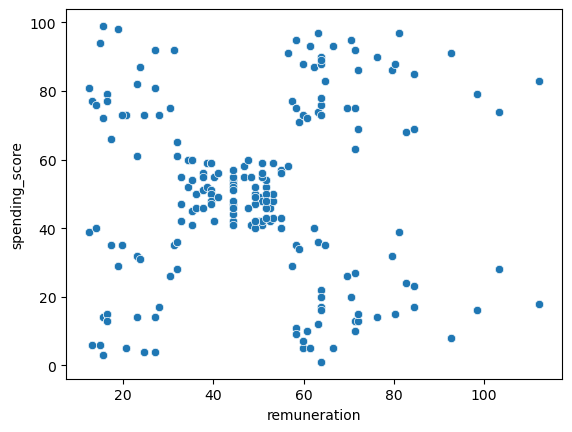

In [12]:
# Create a scatterplot with Seaborn.
sns.scatterplot(x='remuneration',
                y='spending_score',
                data=df2)

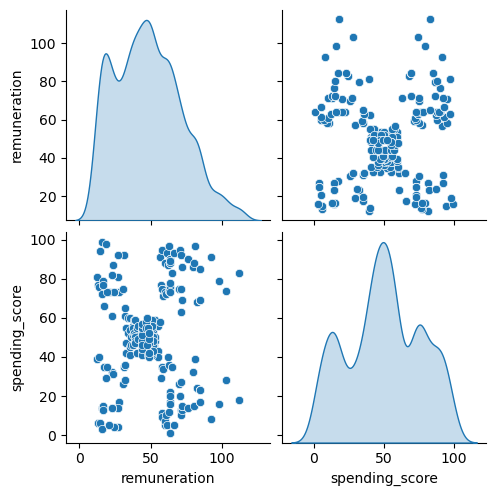

In [14]:
# Create a pairplot with Seaborn.
sns.pairplot(df2,
             vars=df2,
             diag_kind= 'kde')

## 3. Elbow and silhoutte methods

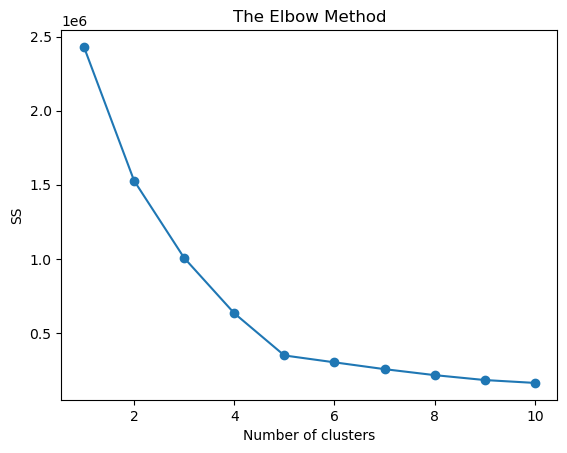

In [16]:
# Determine the number of clusters: Elbow method.
ss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i,
                    init = 'k-means++', 
                    max_iter = 500,
                    n_init = 10,
                    random_state = 42)
    kmeans.fit(df2)
    ss.append(kmeans.inertia_)

plt.plot(range(1, 11),
         ss,
         marker='o')

plt.title("The Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("SS")

plt.show()

Elbow method appears to show an 'elbow' at 5 clusters. Should also take a look at 4 and 6 clusters.

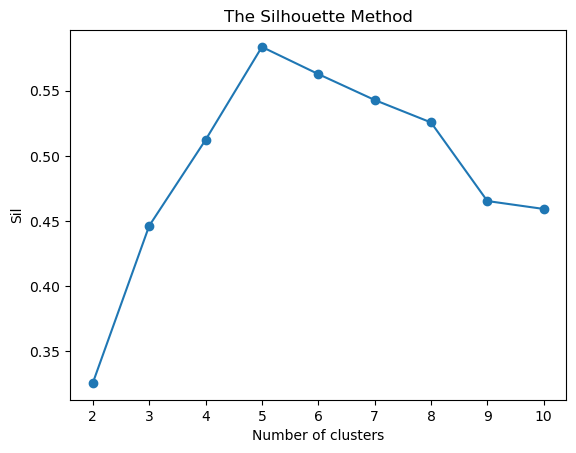

In [17]:
# Determine the number of clusters: Silhouette method.
sil = []
kmax = 10

for k in range(2, kmax+1):
    kmeans_s = KMeans(n_clusters = k).fit(df2)
    labels = kmeans_s.labels_
    sil.append(silhouette_score(df2,
                                labels,
                                metric = 'euclidean'))

# Plot the silhouette method.
plt.plot(range(2, kmax+1),
         sil,
         marker='o')

plt.title("The Silhouette Method")
plt.xlabel("Number of clusters")
plt.ylabel("Sil")

plt.show()

Silhouette method suggests 5 clusters as that is where silhoutte score is closest to +1. May also be worth looking at 4 and 6 clusters.

## 4. Evaluate k-means model at different values of *k*

### Where *k* = 4

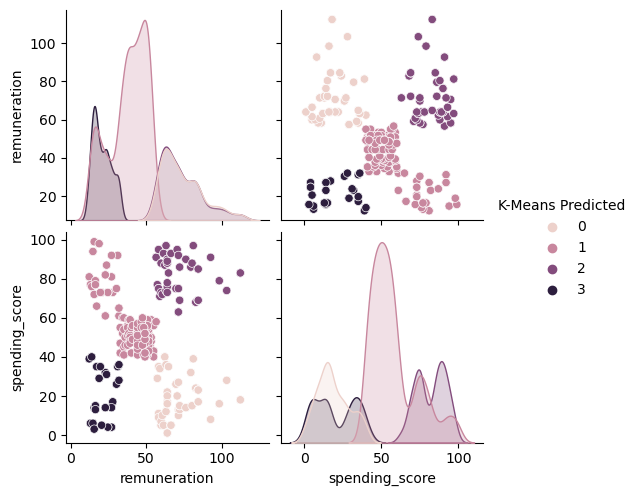

In [18]:
# Use 4 clusters:
kmeans = KMeans(n_clusters = 4,
                max_iter = 15000,
                init='k-means++',
                random_state=42).fit(df2)

clusters = kmeans.labels_
df2['K-Means Predicted'] = clusters

# Plot the predicted.
sns.pairplot(df2,
             hue='K-Means Predicted',
             diag_kind= 'kde')

In [19]:
# Check the number of observations per predicted class.
df2['K-Means Predicted'].value_counts()

1    1013
2     356
0     351
3     280
Name: K-Means Predicted, dtype: int64

#### Visualisation where *k* = 4

<Axes: xlabel='remuneration', ylabel='spending_score'>

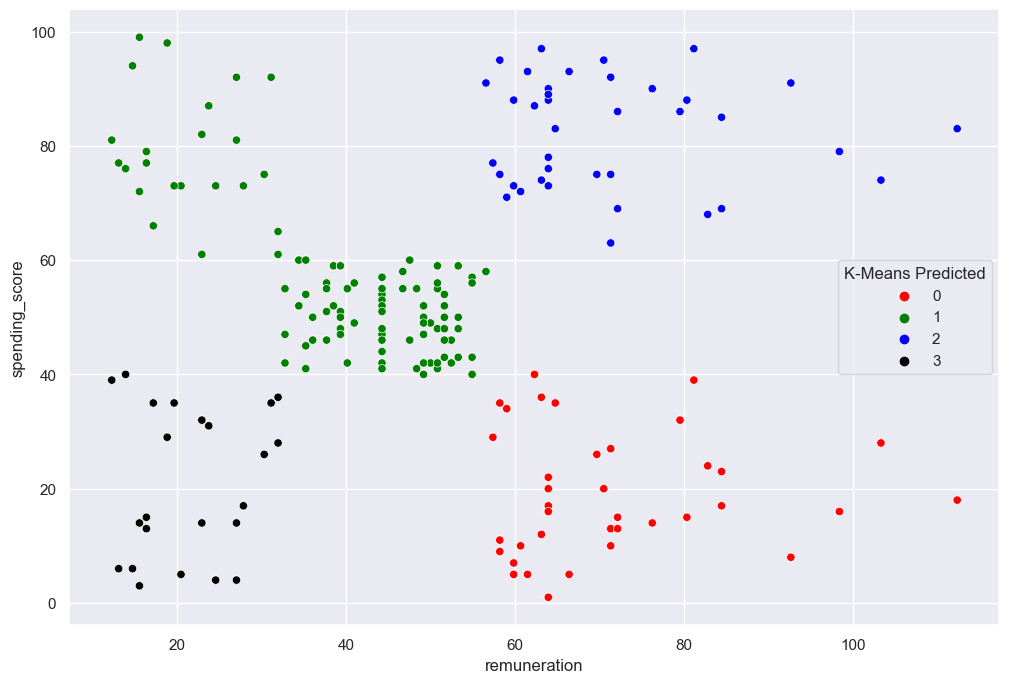

In [20]:
# Visualising the clusters.
# Set plot size.
sns.set(rc = {'figure.figsize':(12, 8)})

sns.scatterplot(x='remuneration' , 
                y ='spending_score',
                data=df2 ,
                hue='K-Means Predicted',
                palette=['red', 'green', 'blue', 'black'])

### Where *k* = 5

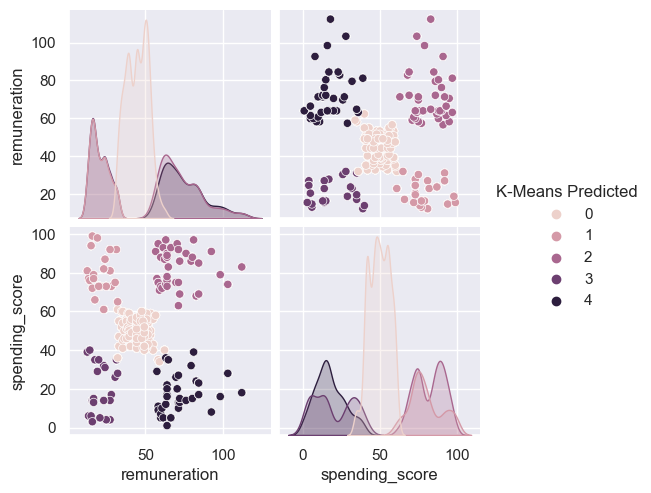

In [21]:
# Use 5 clusters:
kmeans = KMeans(n_clusters = 5,
                max_iter = 15000,
                init='k-means++',
                random_state=42).fit(df2)

clusters = kmeans.labels_
df2['K-Means Predicted'] = clusters

# Plot the predicted.
sns.pairplot(df2,
             hue='K-Means Predicted',
             diag_kind= 'kde')

In [22]:
# Check the number of observations per predicted class.
df2['K-Means Predicted'].value_counts()

0    774
2    356
4    330
3    271
1    269
Name: K-Means Predicted, dtype: int64

#### Visualisation where *k* = 5

<Axes: xlabel='remuneration', ylabel='spending_score'>

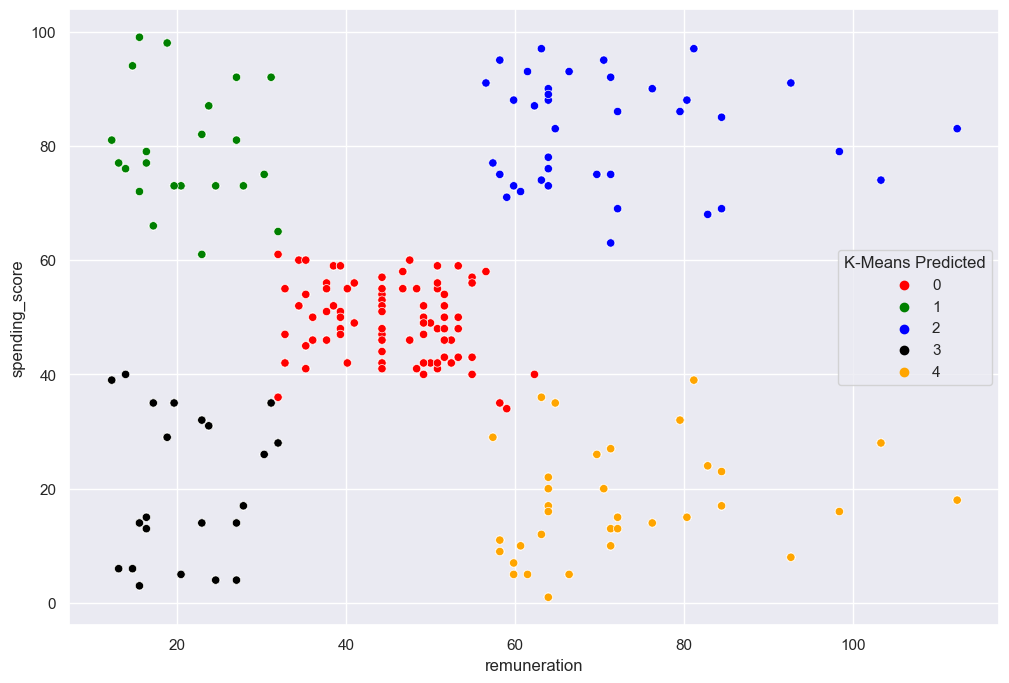

In [24]:
# Visualising the clusters.
# Set plot size.
sns.set(rc = {'figure.figsize':(12, 8)})

sns.scatterplot(x='remuneration' , 
                y ='spending_score',
                data=df2 ,
                hue='K-Means Predicted',
                palette=['red', 'green', 'blue', 'black', 'orange'])

### Where *k* = 6

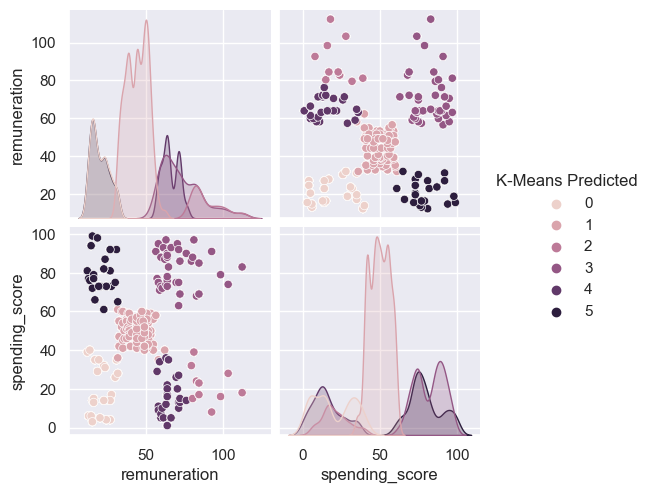

In [25]:
# Use 6 clusters:
kmeans = KMeans(n_clusters = 6,
                max_iter = 15000,
                init='k-means++',
                random_state=42).fit(df2)

clusters = kmeans.labels_
df2['K-Means Predicted'] = clusters

# Plot the predicted.
sns.pairplot(df2,
             hue='K-Means Predicted',
             diag_kind= 'kde')

In [26]:
# Check the number of observations per predicted class.
df2['K-Means Predicted'].value_counts()

1    767
3    356
0    271
5    269
4    214
2    123
Name: K-Means Predicted, dtype: int64

#### Visualisation where *k* = 6

<Axes: xlabel='remuneration', ylabel='spending_score'>

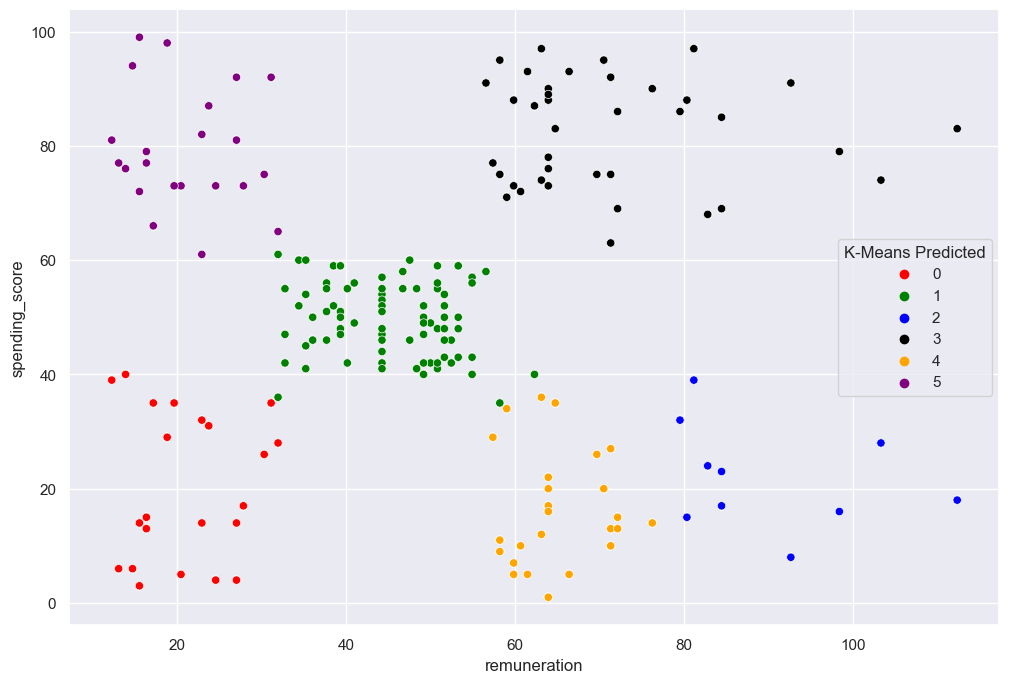

In [27]:
# Visualising the clusters.
# Set plot size.
sns.set(rc = {'figure.figsize':(12, 8)})

sns.scatterplot(x='remuneration' , 
                y ='spending_score',
                data=df2 ,
                hue='K-Means Predicted',
                palette=['red', 'green', 'blue', 'black', 'orange', 'purple'])

There appears to be the most easily distinguishable and distinct clusters where *k* = 5.

## 5. Fit final model and justify your choice

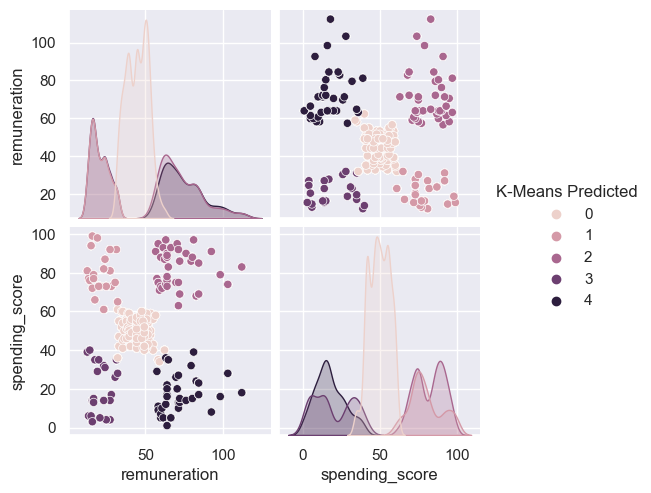

In [28]:
# Apply the final model.
# Use 5 clusters:
kmeans = KMeans(n_clusters = 5,
                max_iter = 15000,
                init='k-means++',
                random_state=42).fit(df2)

clusters = kmeans.labels_
df2['K-Means Predicted'] = clusters

# Plot the predicted.
sns.pairplot(df2,
             hue='K-Means Predicted',
             diag_kind= 'kde')

In [29]:
# Check the number of observations per predicted class.
df2['K-Means Predicted'].value_counts()

0    774
2    356
4    330
3    271
1    269
Name: K-Means Predicted, dtype: int64

Cluster 0 appears to be the largest as it can be seen as the typical (average) customer group that has an average level of spending and remuneration. All other clusters are peripheral groups and have fairly similar though it can be noted that those with a higher remuneration score appear to have a slightly larger number of observations. 

## 6. Plot and interpret the clusters

<Axes: xlabel='remuneration', ylabel='spending_score'>

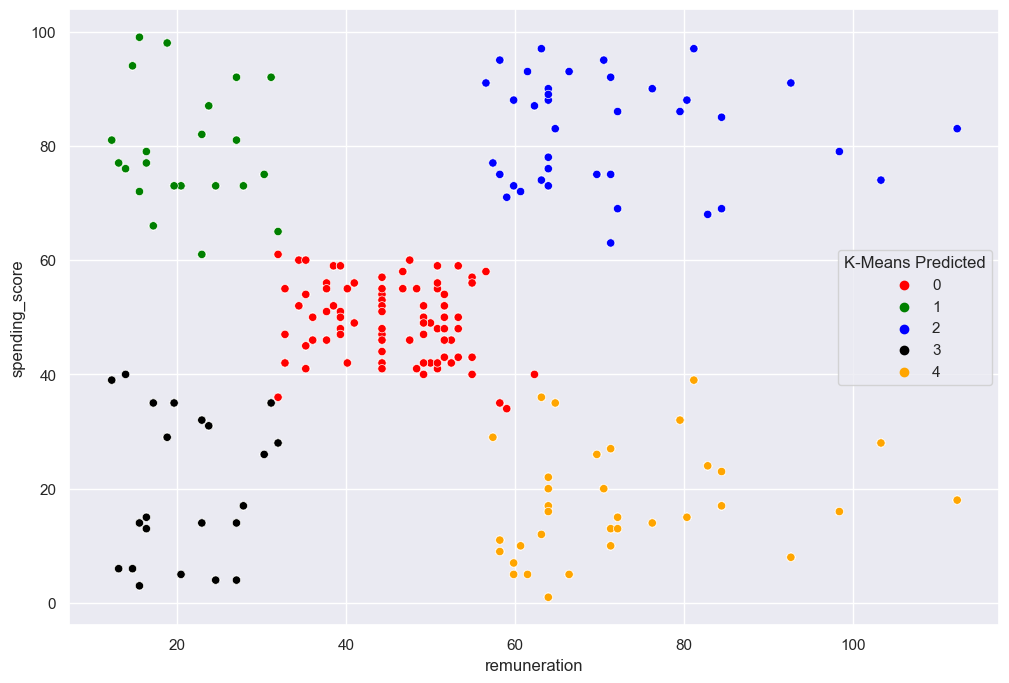

In [30]:
# Visualising the clusters.
# Set plot size.
sns.set(rc = {'figure.figsize':(12, 8)})

sns.scatterplot(x='remuneration' , 
                y ='spending_score',
                data=df2 ,
                hue='K-Means Predicted',
                palette=['red', 'green', 'blue', 'black', 'orange'])

In [32]:
# View the K-Means predicted.
print(df2.head())

   remuneration  spending_score  K-Means Predicted
0         12.30              39                  3
1         12.30              81                  1
2         13.12               6                  3
3         13.12              77                  1
4         13.94              40                  3


## 7. Discuss: Insights and observations

***Your observations here...***

The results of the elbow and silhouette methods suggested a value of *k* between 4 and 6. After testing all three, *k* = 5 yeilded the most distinct and clusters. This suggests that customers can largely be placed in 5 groups depending on their remuneration and and spending score.

Cluster 0 appears to be the largest as it can be seen as the typical (average) customer group that has an average level of spending and remuneration. All other clusters are peripheral groups and have fairly similar though it can be noted that those with a higher remuneration score appear to have a slightly larger number of observations.

Hence, it may be best to focuse mostly on customers that fit within cluster 0 and also those who tend to have a higher remuneration score if the goal is to target the highest numbers of customers.

Exploring further, I would look at if there was a 3rd factor moderating this clustering that could explain it.

# 

# Week 3 assignment: NLP using Python
Customer reviews were downloaded from the website of Turtle Games. This data will be used to steer the marketing department on how to approach future campaigns. Therefore, the marketing department asked you to identify the 15 most common words used in online product reviews. They also want to have a list of the top 20 positive and negative reviews received from the website. Therefore, you need to apply NLP on the data set.

## Instructions
1. Load and explore the data. 
    1. Sense-check the DataFrame.
    2. You only need to retain the `review` and `summary` columns.
    3. Determine if there are any missing values.
2. Prepare the data for NLP
    1. Change to lower case and join the elements in each of the columns respectively (`review` and `summary`).
    2. Replace punctuation in each of the columns respectively (`review` and `summary`).
    3. Drop duplicates in both columns (`review` and `summary`).
3. Tokenise and create wordclouds for the respective columns (separately).
    1. Create a copy of the DataFrame.
    2. Apply tokenisation on both columns.
    3. Create and plot a wordcloud image.
4. Frequency distribution and polarity.
    1. Create frequency distribution.
    2. Remove alphanumeric characters and stopwords.
    3. Create wordcloud without stopwords.
    4. Identify 15 most common words and polarity.
5. Review polarity and sentiment.
    1. Plot histograms of polarity (use 15 bins) for both columns.
    2. Review the sentiment scores for the respective columns.
6. Identify and print the top 20 positive and negative reviews and summaries respectively.
7. Include your insights and observations.

## 1. Load and explore the data

In [132]:
# Import all the necessary packages.
import pandas as pd
import numpy as np
import nltk 
import os 
import matplotlib.pyplot as plt
import seaborn as sns

# nltk.download ('punkt').
# nltk.download ('stopwords').

from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from textblob import TextBlob
from scipy.stats import norm

# Import Counter.
from collections import Counter

import warnings
warnings.filterwarnings('ignore')

In [133]:
# Load the data set as df3.
df3 = pd.read_csv('reviews.csv')

# View DataFrame.
print(reviews.shape)
df3.head()

(2000, 10)


,Unnamed: 0,gender,age,remuneration,spending_score,loyalty_points,education,product,review,summary
0,0,Male,18,12.30,39,210,graduate,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,1,Male,23,12.30,81,524,graduate,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,2,Female,22,13.12,6,40,graduate,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,3,Female,25,13.12,77,562,graduate,263,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,4,Female,33,13.94,40,366,graduate,291,As my review of GF9's previous screens these w...,Money trap


In [134]:
# Explore data set.
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      2000 non-null   int64  
 1   gender          2000 non-null   object 
 2   age             2000 non-null   int64  
 3   remuneration    2000 non-null   float64
 4   spending_score  2000 non-null   int64  
 5   loyalty_points  2000 non-null   int64  
 6   education       2000 non-null   object 
 7   product         2000 non-null   int64  
 8   review          2000 non-null   object 
 9   summary         2000 non-null   object 
dtypes: float64(1), int64(5), object(4)
memory usage: 156.4+ KB


In [135]:
# Drop unnecessary columns.
df3 = df3[['review', 'summary']]

# View DataFrame.
df3.head()

,review,summary
0,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,As my review of GF9's previous screens these w...,Money trap


In [136]:
# Determine if there are any missing values.
df3.isna().sum()

review     0
summary    0
dtype: int64

## 2. Prepare the data for NLP
### 2a) Change to lower case and join the elements in each of the columns respectively (review and summary)

In [137]:
# Review: Change all to lower case and join with a space.
df3['review'] = df3['review'].apply(lambda x: " ".join(x.lower() for x in x.split()))

# Preview the result.
df3['review'].head()

0    when it comes to a dm's screen, the space on t...
1    an open letter to galeforce9*: your unpainted ...
2    nice art, nice printing. why two panels are fi...
3    amazing buy! bought it as a gift for our new d...
4    as my review of gf9's previous screens these w...
Name: review, dtype: object

In [138]:
# Summary: Change all to lower case and join with a space.
df3['summary'] = df3['summary'].apply(lambda x: " ".join(x.lower() for x in x.split()))

# Preview the result.
df3['summary'].head()

0    the fact that 50% of this space is wasted on a...
1    another worthless dungeon master's screen from...
2                      pretty, but also pretty useless
3                                           five stars
4                                           money trap
Name: summary, dtype: object

### 2b) Replace punctuation in each of the columns respectively (review and summary)

In [139]:
# Replace all the punctuations in review column.
df3['review'] = df3['review'].str.replace('[^\w\s]','')

# View output.
df3['review'].head()

0    when it comes to a dms screen the space on the...
1    an open letter to galeforce9 your unpainted mi...
2    nice art nice printing why two panels are fill...
3    amazing buy bought it as a gift for our new dm...
4    as my review of gf9s previous screens these we...
Name: review, dtype: object

In [140]:
# Replace all the puncuations in summary column.
df3['summary'] = df3['summary'].str.replace('[^\w\s]','')

# View output.
df3['summary'].head()

0    the fact that 50 of this space is wasted on ar...
1    another worthless dungeon masters screen from ...
2                       pretty but also pretty useless
3                                           five stars
4                                           money trap
Name: summary, dtype: object

### 2c) Drop duplicates in both columns

In [141]:
# Check the number of duplicate values
df3.duplicated().sum()

39

In [142]:
# Drop duplicates in both columns.
df3 = df3.drop_duplicates(subset=['review', 'summary'])

# View DataFrame.
df3.reset_index(inplace=True)
df3.head()

,index,review,summary
0,0,when it comes to a dms screen the space on the...,the fact that 50 of this space is wasted on ar...
1,1,an open letter to galeforce9 your unpainted mi...,another worthless dungeon masters screen from ...
2,2,nice art nice printing why two panels are fill...,pretty but also pretty useless
3,3,amazing buy bought it as a gift for our new dm...,five stars
4,4,as my review of gf9s previous screens these we...,money trap


## 3. Tokenise and create wordclouds

In [143]:
# Create new DataFrame (copy DataFrame).
df3_copy = df3.copy()

# View DataFrame.
df3_copy.head()

,index,review,summary
0,0,when it comes to a dms screen the space on the...,the fact that 50 of this space is wasted on ar...
1,1,an open letter to galeforce9 your unpainted mi...,another worthless dungeon masters screen from ...
2,2,nice art nice printing why two panels are fill...,pretty but also pretty useless
3,3,amazing buy bought it as a gift for our new dm...,five stars
4,4,as my review of gf9s previous screens these we...,money trap


In [144]:
# Apply tokenisation to both columns.
df3_copy['tokens_review'] = df3_copy['review'].apply(word_tokenize)
df3_copy['tokens_summary'] = df3_copy['summary'].apply(word_tokenize)

# View DataFrame.
df3_copy.head()

,index,review,summary,tokens_review,tokens_summary
0,0,when it comes to a dms screen the space on the...,the fact that 50 of this space is wasted on ar...,"[when, it, comes, to, a, dms, screen, the, spa...","[the, fact, that, 50, of, this, space, is, was..."
1,1,an open letter to galeforce9 your unpainted mi...,another worthless dungeon masters screen from ...,"[an, open, letter, to, galeforce9, your, unpai...","[another, worthless, dungeon, masters, screen,..."
2,2,nice art nice printing why two panels are fill...,pretty but also pretty useless,"[nice, art, nice, printing, why, two, panels, ...","[pretty, but, also, pretty, useless]"
3,3,amazing buy bought it as a gift for our new dm...,five stars,"[amazing, buy, bought, it, as, a, gift, for, o...","[five, stars]"
4,4,as my review of gf9s previous screens these we...,money trap,"[as, my, review, of, gf9s, previous, screens, ...","[money, trap]"


In [145]:
# String all the comments together in a single variable.
# Create an empty string variable.
all_reviews = ''
for i in range(df3_copy.shape[0]):
    # Add each comment.
    all_reviews = all_reviews + df3_copy['review'][i]

In [146]:
# Review: Create a word cloud.
# Set the colour palette.
sns.set(color_codes=True)

# Create a WordCloud object.
word_cloud_review = WordCloud(width = 1600, height = 900, 
                    background_color ='white',
                    colormap = 'plasma', 
                    stopwords = 'none',
                    min_font_size = 10).generate(all_reviews) 

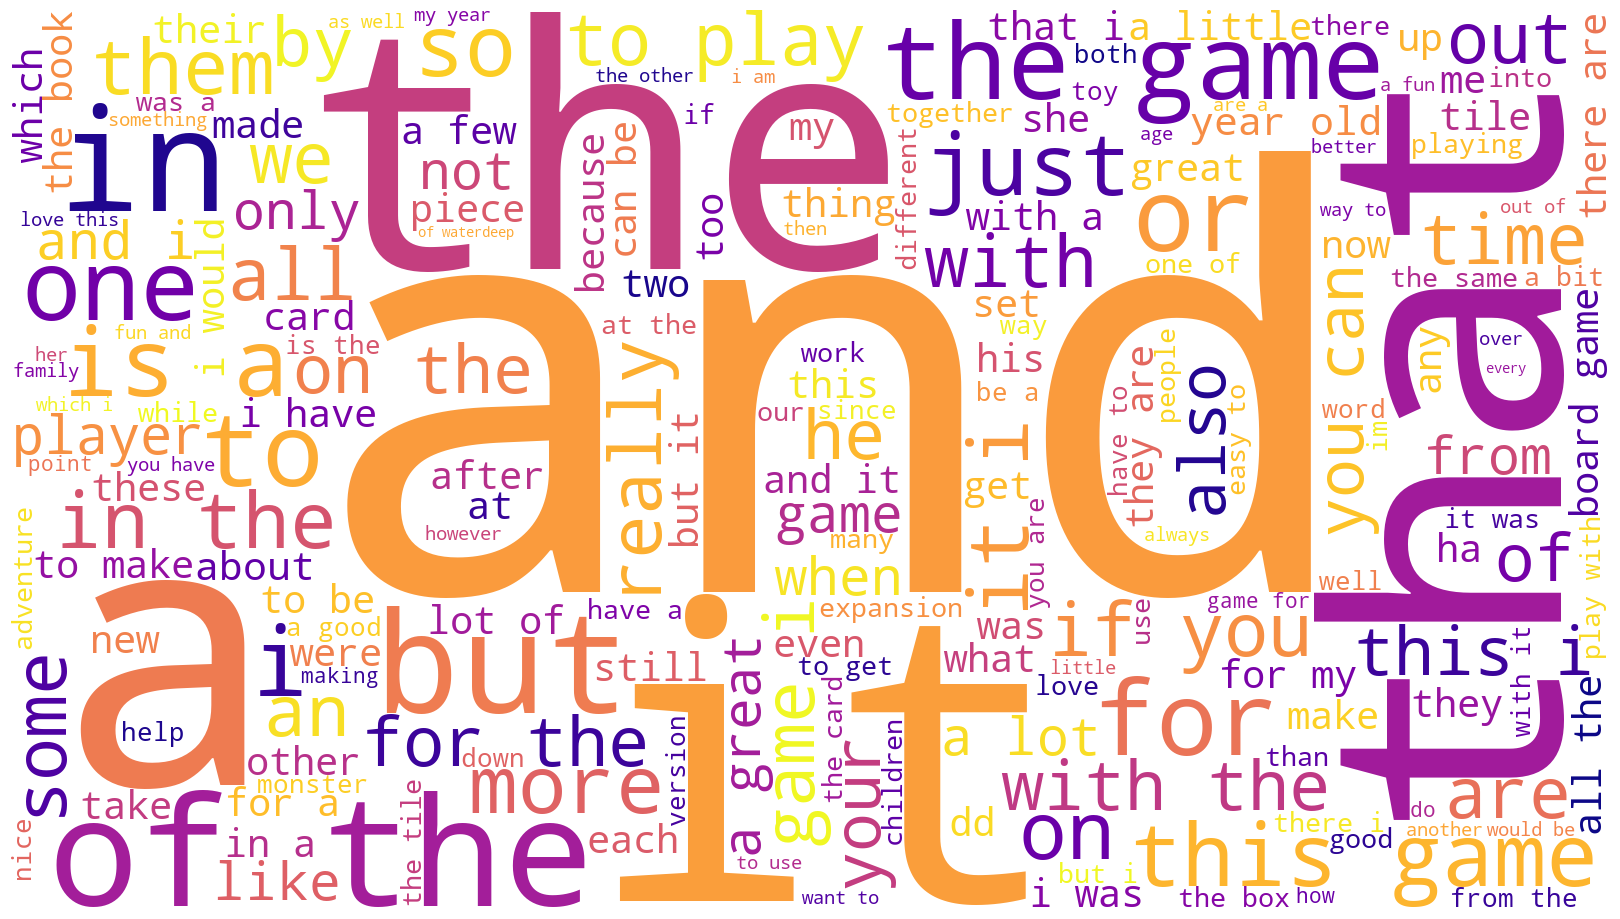

In [147]:
# Review: Plot the WordCloud image.
plt.figure(figsize = (16, 9), facecolor = None) 
plt.imshow(word_cloud_review) 
plt.axis('off') 
plt.tight_layout(pad = 0) 
plt.show()

In [148]:
# Create an empty string variable.
all_summary = ''
for i in range(df3_copy.shape[0]):
    # Add each comment.
    all_summary = all_summary + df3_copy['summary'][i]

In [149]:
# Summary: Create a word cloud.
# Set the colour palette.
sns.set(color_codes=True)

# Create a WordCloud object.
word_cloud_summary = WordCloud(width = 1600, height = 900, 
                    background_color ='white',
                    colormap = 'plasma', 
                    stopwords = 'none',
                    min_font_size = 10).generate(all_summary) 

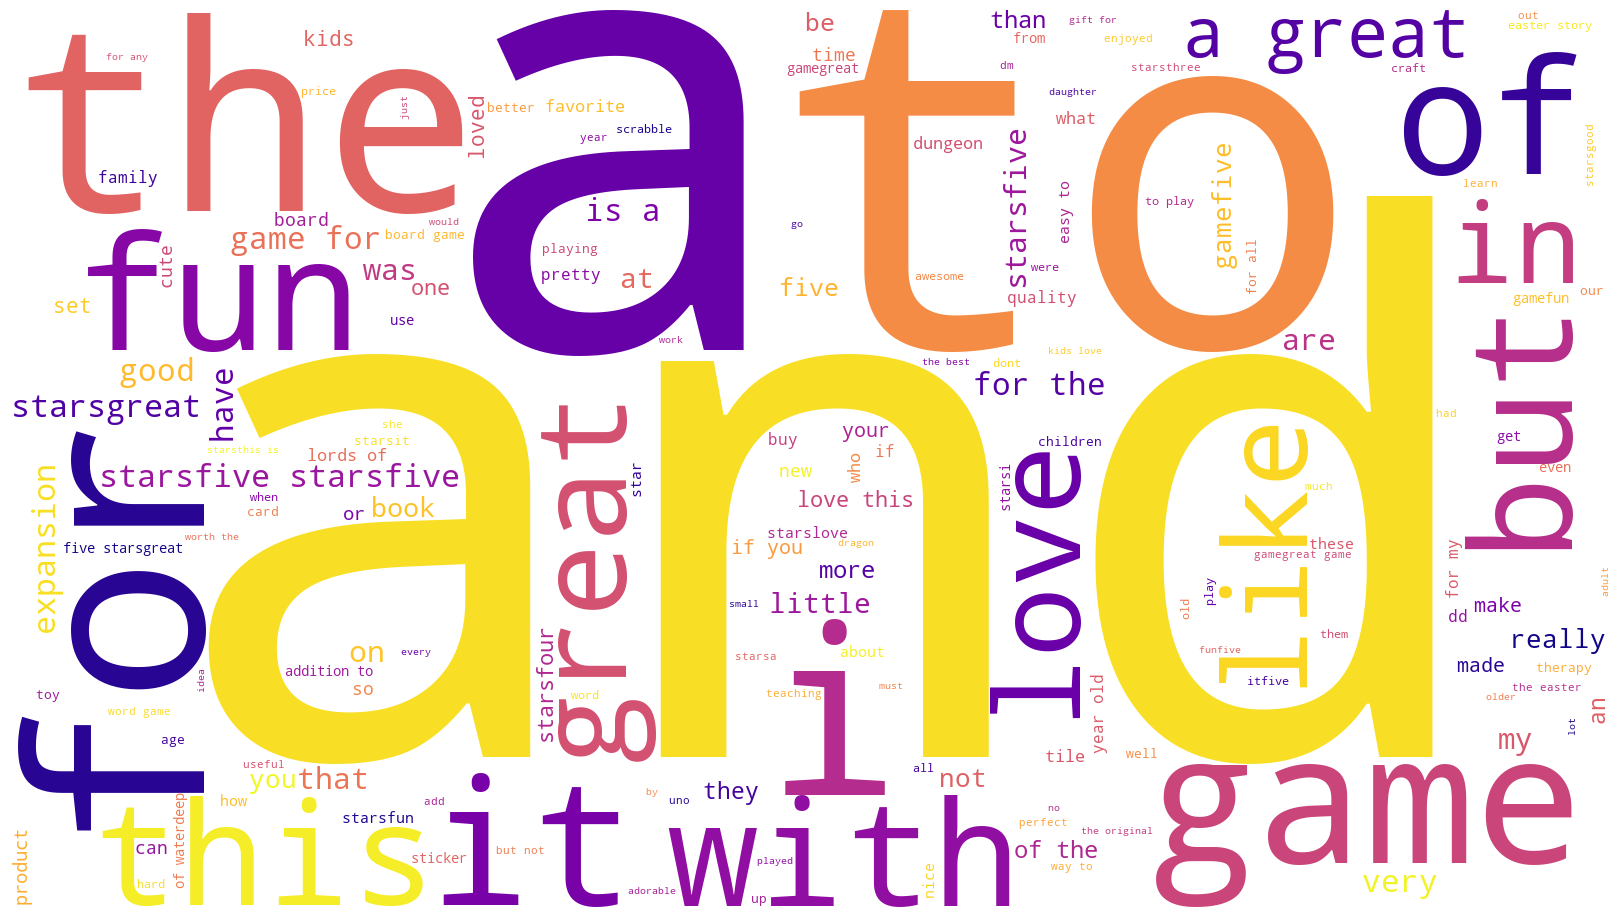

In [150]:
# Summary: Plot the WordCloud image.
plt.figure(figsize = (16, 9), facecolor = None) 
plt.imshow(word_cloud_summary) 
plt.axis('off') 
plt.tight_layout(pad = 0) 
plt.show()

## 4. Frequency distribution and polarity
### 4a) Create frequency distribution

In [151]:
# Determine the frequency distribution of reviews.
# Define an empty list of tokens.
all_tokens_review = []

for i in range(df3_copy.shape[0]):
    # Add each token to the list.
    all_tokens_review = all_tokens_review + df3_copy['tokens_review'][i]

In [152]:
# Calculate the frequency distribution.
fdist_r = FreqDist(all_tokens_review)

# Preview data.
fdist_r

FreqDist({'the': 5451, 'and': 3233, 'to': 3162, 'a': 3160, 'of': 2488, 'i': 2090, 'it': 2083, 'is': 1782, 'this': 1776, 'game': 1671, ...})

In [153]:
# Determine the frequency distribution of summaries.
# Define an empty list of tokens.
all_tokens_summaries = []

for i in range(df3_copy.shape[0]):
    # Add each token to the list.
    all_tokens_summaries = all_tokens_summaries + df3_copy['tokens_summary'][i]

In [154]:
# Calculate the frequency distribution.
fdist_s = FreqDist(all_tokens_review)

# Preview data.
fdist_s

FreqDist({'the': 5451, 'and': 3233, 'to': 3162, 'a': 3160, 'of': 2488, 'i': 2090, 'it': 2083, 'is': 1782, 'this': 1776, 'game': 1671, ...})

### 4b) Remove alphanumeric characters and stopwords

In [155]:
# Delete all the alpanum.
tokens_r = [word for word in all_tokens_review if word.isalnum()]
tokens_s = [word for word in all_tokens_summaries if word.isalnum()]

In [156]:
# Remove all the stopwords in reviews.
# Create a set of English stopwords.
english_stopwords = set(stopwords.words('english'))

# Create a filtered list of tokens without stopwords.
tokens_r_2 = [x for x in tokens_r if x.lower() not in english_stopwords]

# Define an empty string variable.
tokens_r_2_string = ''

for value in tokens_r:
    # Add each filtered token word to the string.
    tokens_r_2_string = tokens_r_2_string + value + ' '

In [157]:
# Remove all the stopwords in summaries.
# Create a filtered list of tokens without stopwords.
tokens_s_2 = [x for x in tokens_s if x.lower() not in english_stopwords]

# Define an empty string variable.
tokens_s_2_string = ''

for value in tokens_s:
    # Add each filtered token word to the string.
    tokens_s_2_string = tokens_s_2_string + value + ' '

### 4c) Create wordcloud without stopwords

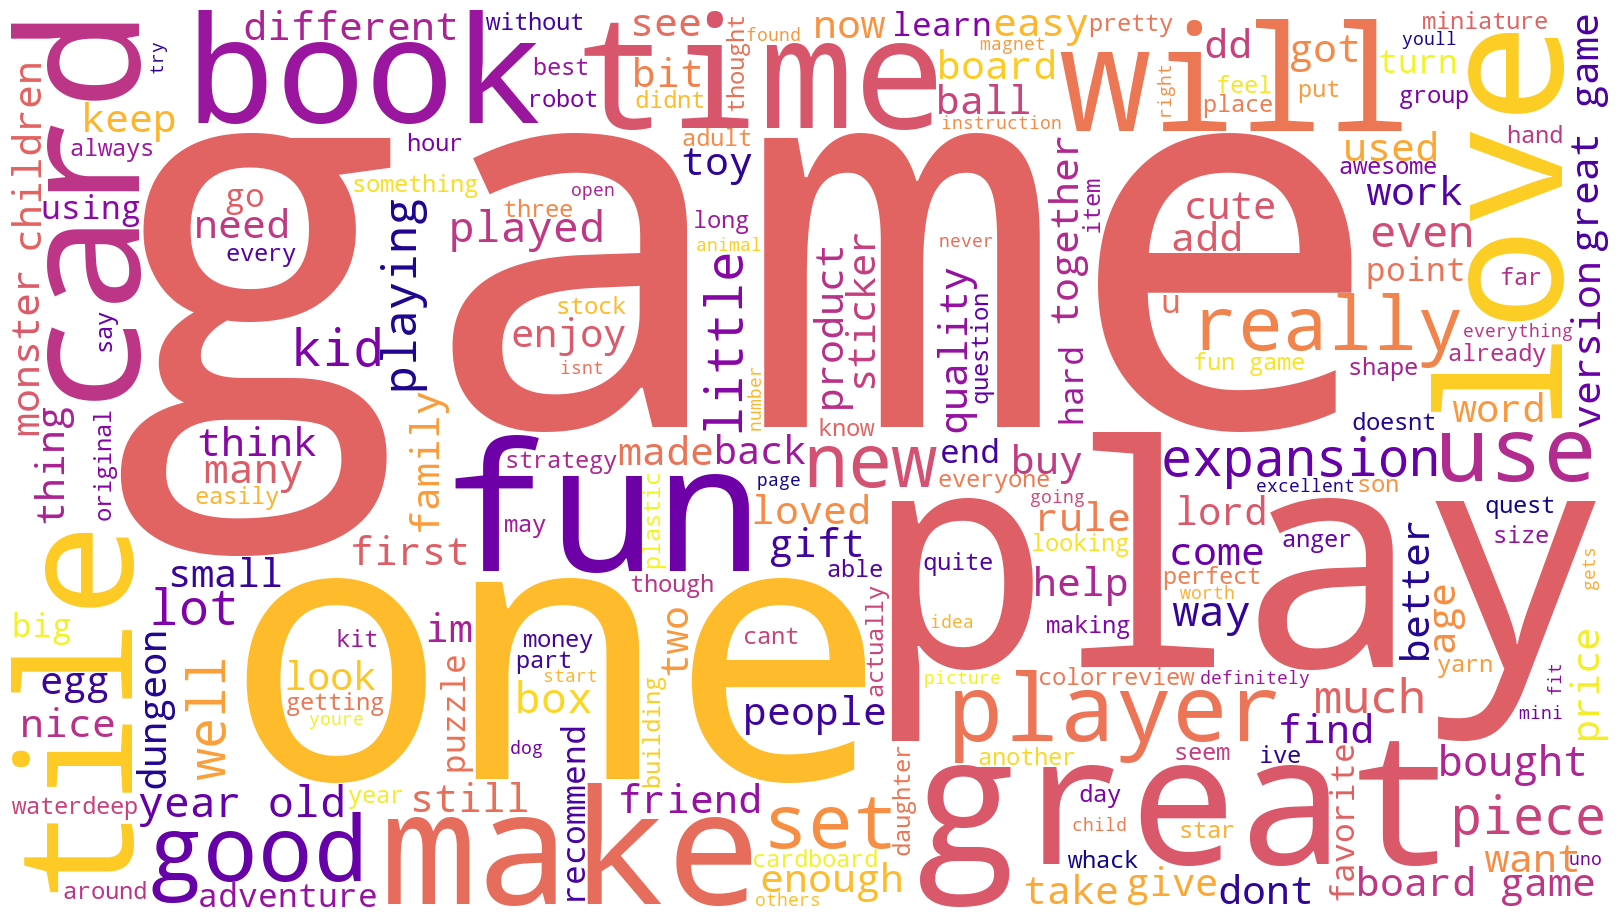

In [158]:
# Create a wordcloud without stop words for reviews.
wordcloud_r_2 = WordCloud(width = 1600, height = 900, 
                background_color ='white', 
                colormap='plasma', 
                min_font_size = 10).generate(tokens_r_2_string) 

# Plot the WordCloud image.                        
plt.figure(figsize = (16, 9), facecolor = None) 
plt.imshow(wordcloud_r_2) 
plt.axis('off') 
plt.tight_layout(pad = 0) 
plt.show()

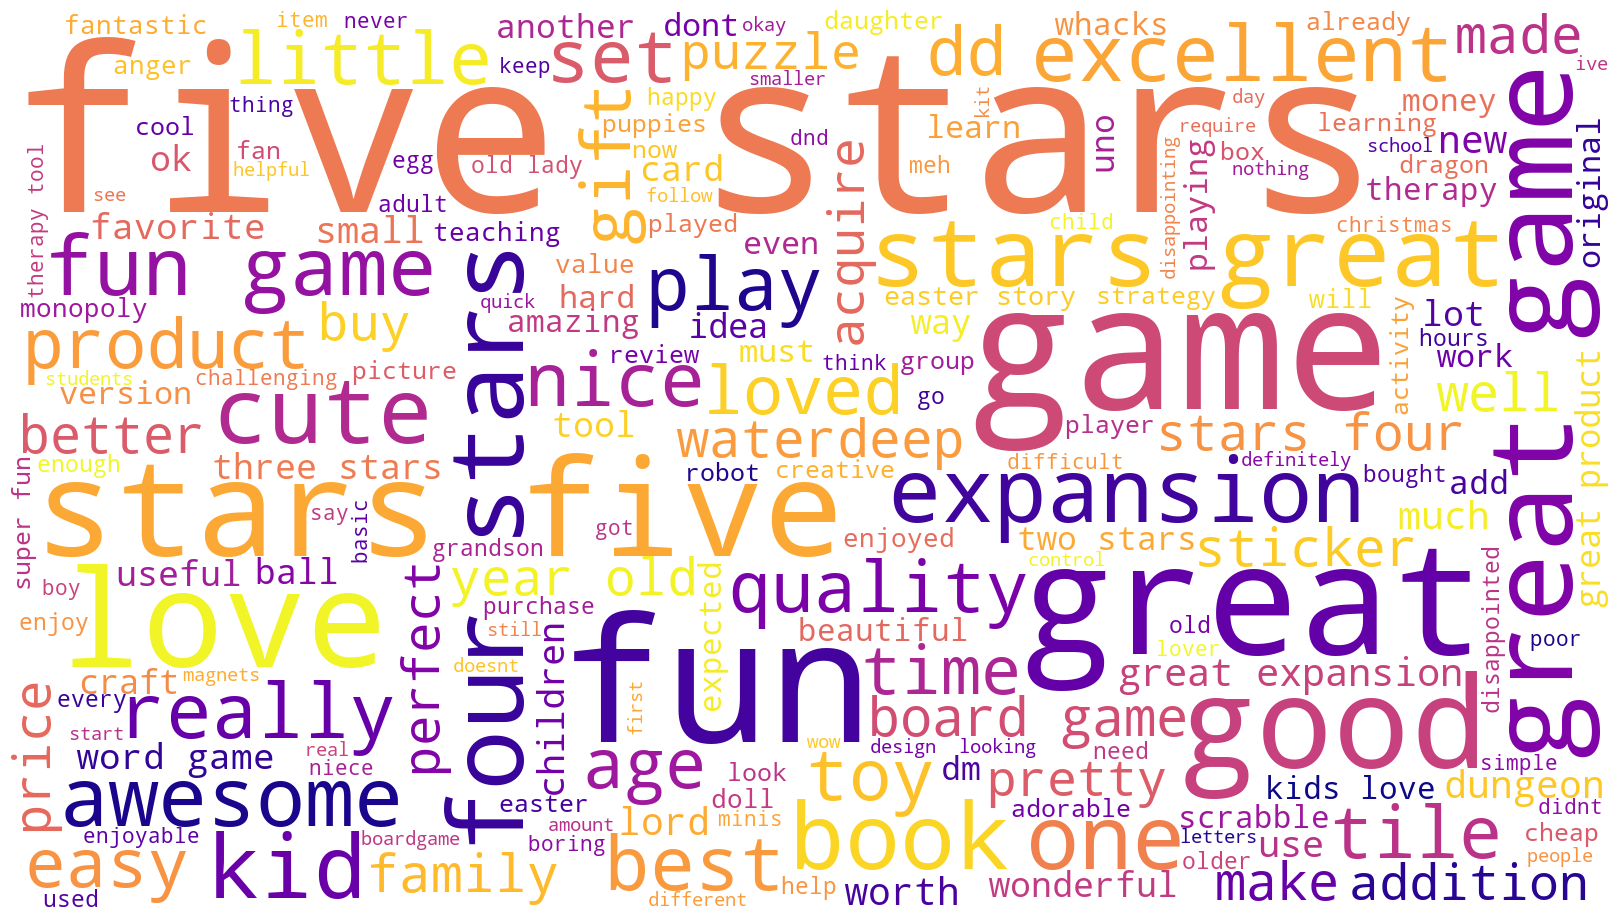

In [159]:
# Plot the wordcloud image.
wordcloud_s_2 = WordCloud(width = 1600, height = 900, 
                background_color ='white', 
                colormap='plasma', 
                min_font_size = 10).generate(tokens_s_2_string) 

# Plot the WordCloud image.                        
plt.figure(figsize = (16, 9), facecolor = None) 
plt.imshow(wordcloud_s_2) 
plt.axis('off') 
plt.tight_layout(pad = 0) 
plt.show()

### 4d) Identify 15 most common words and polarity

In [160]:
# View the frequency distribution for reviews.
fdist_r_2 = FreqDist(tokens_r_2)

# Preview the data.
fdist_r_2

FreqDist({'game': 1671, 'great': 580, 'fun': 552, 'one': 530, 'play': 502, 'like': 414, 'love': 323, 'really': 319, 'get': 319, 'cards': 301, ...})

In [161]:
# Determine the 15 most common words in reviews.
counts_r = pd.DataFrame(Counter(tokens_r_2).most_common(15),
                      columns=['Word', 'Frequency']).set_index('Word')

# Preview data.
counts_r

,Frequency
Word,
game,1671
great,580
fun,552
one,530
play,502
like,414
love,323
really,319
get,319


In [162]:
# View the frequency distribution for summaries.
fdist_s_2 = FreqDist(tokens_s_2)

# Preview the data.
fdist_s_2

FreqDist({'stars': 427, 'five': 342, 'game': 319, 'great': 295, 'fun': 218, 'love': 93, 'good': 92, 'four': 58, 'like': 54, 'expansion': 52, ...})

In [163]:
# Determine the 15 most common words in reviews.
counts_s = pd.DataFrame(Counter(tokens_s_2).most_common(15),
                      columns=['Word', 'Frequency']).set_index('Word')

# Preview data.
counts_s

,Frequency
Word,
stars,427
five,342
game,319
great,295
fun,218
love,93
good,92
four,58
like,54


## 5. Review polarity and sentiment: Plot histograms of polarity (use 15 bins) and sentiment scores for the respective columns.

In [164]:
# Provided function.
def generate_polarity(comment):
    '''Extract polarity score (-1 to +1) for each comment'''
    return TextBlob(comment).sentiment[0]

In [165]:
# Determine polarity of both columns. 
# Populate a new column with polarity scores for each comment.
df3_copy['polarity_r'] = df3_copy['review'].apply(generate_polarity)

# Preview the result.
df3_copy['polarity_r'].head()

0   -0.036111
1    0.035952
2    0.116640
3    0.578788
4   -0.316667
Name: polarity_r, dtype: float64

In [166]:
# Determine polarity of both columns. 
# Populate a new column with polarity scores for each comment.
df3_copy['polarity_s'] = df3_copy['summary'].apply(generate_polarity)

# Preview the result.
df3_copy['polarity_s'].head()

0    0.15
1   -0.80
2    0.00
3    0.00
4    0.00
Name: polarity_s, dtype: float64

### (Extra) Subjectivity

In [170]:
# Define a function to extract a subjectivity score for the comment.
def generate_subjectivity(comment):
    return TextBlob(comment).sentiment[1]

In [171]:
# Populate a new column with subjectivity scores for each review.
df3_copy['subjectivity_r'] = df3_copy['review'].apply(generate_subjectivity)

# Preview the result.
df3_copy['subjectivity_r'].head()

0    0.486111
1    0.442976
2    0.430435
3    0.784848
4    0.316667
Name: subjectivity_r, dtype: float64

In [172]:
# Populate a new column with subjectivity scores for each summary.
df3_copy['subjectivity_s'] = df3_copy['summary'].apply(generate_subjectivity)

# Preview the result.
df3_copy['subjectivity_s'].head()

0    0.500000
1    0.900000
2    0.733333
3    0.000000
4    0.000000
Name: subjectivity_s, dtype: float64

### Histograms

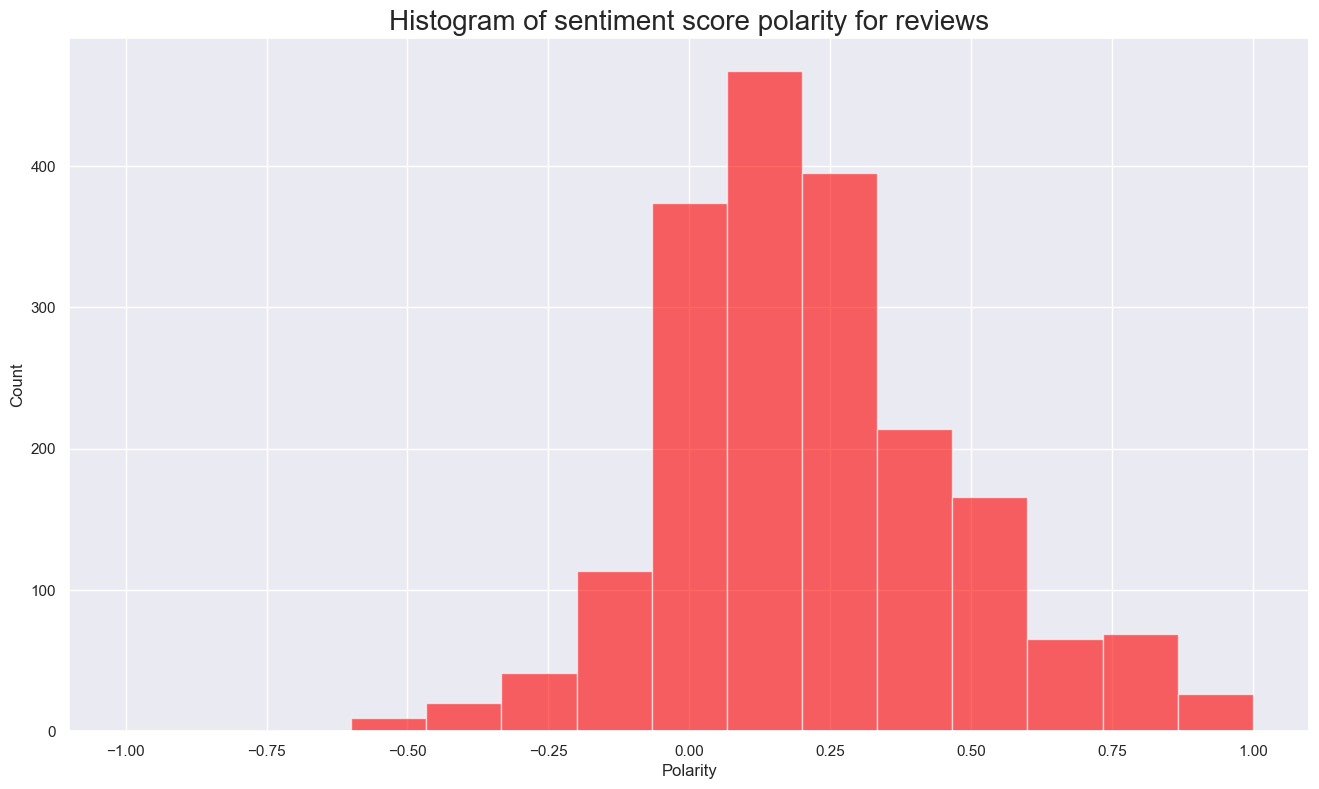

In [167]:
# Review: Create a histogram plot with bins = 15.
# Histogram of polarity
# Set the number of bins.
num_bins = 15

# Set the plot area.
plt.figure(figsize=(16,9))

# Define the bars.
n, bins, patches = plt.hist(df3_copy['polarity_r'], num_bins, facecolor='red', alpha=0.6)

# Set the labels.
plt.xlabel('Polarity', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Histogram of sentiment score polarity for reviews', fontsize=20)

# Histogram of sentiment score
plt.show()

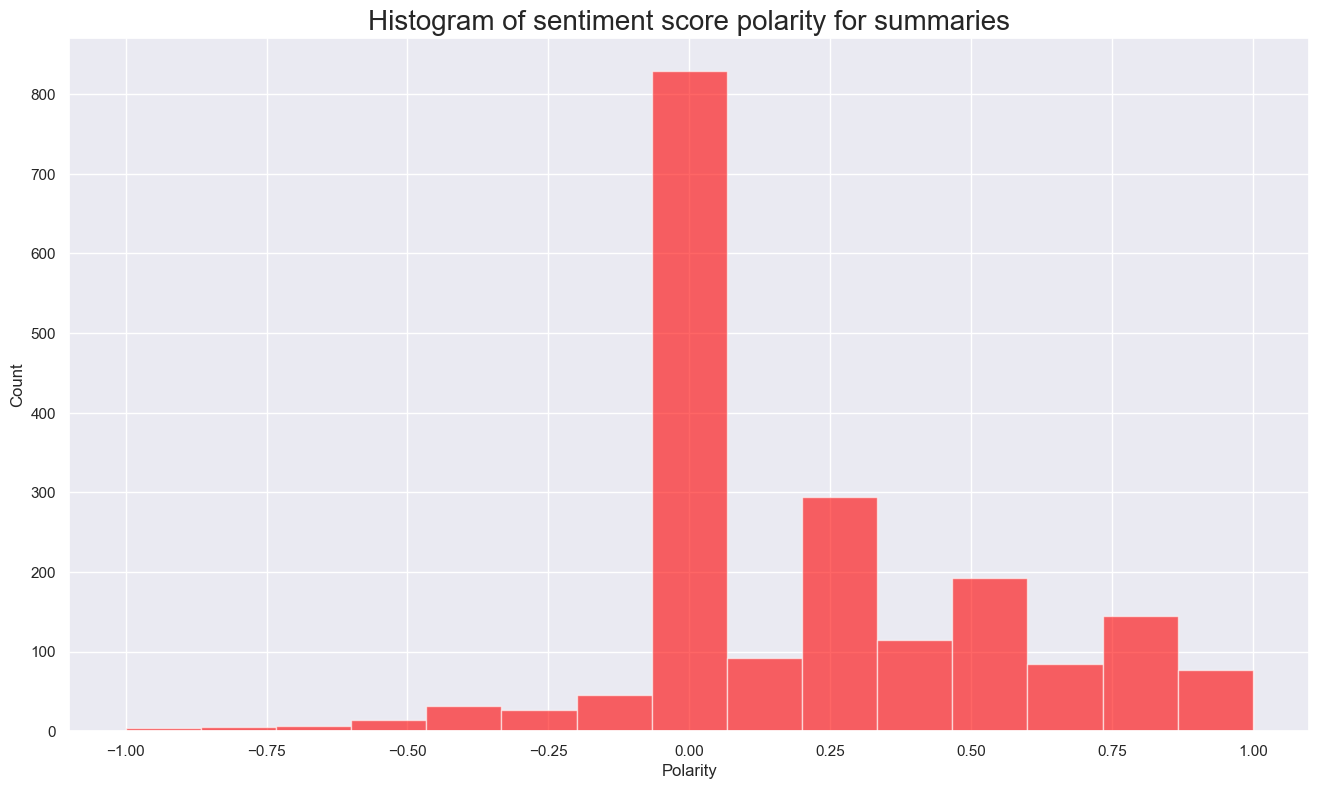

In [168]:
# Summary: Create a histogram plot with bins = 15.
# Histogram of polarity
# Set the number of bins.
num_bins = 15

# Set the plot area.
plt.figure(figsize=(16,9))

# Define the bars.
n, bins, patches = plt.hist(df3_copy['polarity_s'], num_bins, facecolor='red', alpha=0.6)

# Set the labels.
plt.xlabel('Polarity', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Histogram of sentiment score polarity for summaries', fontsize=20)

# Histogram of sentiment score
plt.show()

## 6. Identify top 20 positive and negative reviews and summaries respectively

In [188]:
# Top 20 negative reviews.
# Create a DataFrame.
negative_sentiment_r = df3_copy.nsmallest(20, 'polarity_r')

# Eliminate unnecessary columns.
negative_sentiment_r = negative_sentiment_r[['review', 'polarity_r', 'subjectivity_r']]

# Adjust the column width.
negative_sentiment_r.style.set_properties(subset=['review'], **{'width': '1200px'})

# View output.
negative_sentiment_r

,review,polarity_r,subjectivity_r
207,booo unles you are patient know how to measure...,-1.000000,1.000000
181,incomplete kit very disappointing,-0.780000,0.910000
1773,im sorry i just find this product to be boring...,-0.583333,0.750000
362,one of my staff will be using this game soon s...,-0.550000,0.300000
116,i bought this as a christmas gift for my grand...,-0.500000,0.900000
226,this was a gift for my daughter i found it dif...,-0.500000,1.000000
229,i found the directions difficult,-0.500000,1.000000
289,instructions are complicated to follow,-0.500000,1.000000
300,difficult,-0.500000,1.000000
1501,expensive for what you get,-0.500000,0.700000


In [184]:
# Top 20 negative summaries.
# Create a DataFrame.
negative_sentiment_s = df3_copy.nsmallest(20, 'polarity_s')

# Eliminate unnecessary columns.
negative_sentiment_s = negative_sentiment_s[['summary', 'polarity_s', 'subjectivity_s']]

# Adjust the column width.
negative_sentiment_s.style.set_properties(subset=['summary'], **{'width': '2000px'})

# View output.
negative_sentiment_s

,summary,polarity_s,subjectivity_s
21,the worst value ive ever seen,-1.000000,1.000000
207,boring unless you are a craft person which i am,-1.000000,1.000000
819,boring,-1.000000,1.000000
1148,before this i hated running any rpg campaign d...,-0.900000,0.700000
1,another worthless dungeon masters screen from ...,-0.800000,0.900000
143,disappointed,-0.750000,0.750000
623,disappointed,-0.750000,0.750000
785,disappointed,-0.750000,0.750000
1591,disappointed,-0.750000,0.750000
361,promotes anger instead of teaching calming met...,-0.700000,0.200000


In [178]:
# Top 20 positive reviews.
# Create a DataFrame.
positive_sentiment_r = df3_copy.nlargest(20, 'polarity_r')

# Eliminate unnecessary columns.
positive_sentiment_r = positive_sentiment_r[['review', 'polarity_r', 'subjectivity_r']]

# Adjust the column width.
positive_sentiment_r.style.set_properties(subset=['review'], **{'width': '1200px'})

# View output.
positive_sentiment_r

,review,polarity_r,subjectivity_r
7,came in perfect condition,1.0,1.0
164,awesome book,1.0,1.0
193,awesome gift,1.0,1.0
489,excellent activity for teaching selfmanagement...,1.0,1.0
517,perfect just what i ordered,1.0,1.0
583,wonderful product,1.0,1.0
601,delightful product,1.0,1.0
613,wonderful for my grandson to learn the resurre...,1.0,1.0
782,perfect,1.0,1.0
923,awesome,1.0,1.0


In [182]:
# Top 20 positive summaries.
# Create a DataFrame.
positive_sentiment_s = df3_copy.nlargest(20, 'polarity_s')

# Eliminate unnecessary columns.
positive_sentiment_s = positive_sentiment_s[['summary', 'polarity_s', 'subjectivity_s']]

# Adjust the column width.
positive_sentiment_s.style.set_properties(subset=['summary'], **{'width': '1200px'})

# View output.
positive_sentiment_s

,summary,polarity_s,subjectivity_s
6,best gm screen ever,1.0,0.3
28,wonderful designs,1.0,1.0
32,perfect,1.0,1.0
80,theyre the perfect size to keep in the car or ...,1.0,1.0
133,perfect for preschooler,1.0,1.0
139,awesome sticker activity for the price,1.0,1.0
160,awesome book,1.0,1.0
162,he was very happy with his gift,1.0,1.0
186,awesome,1.0,1.0
209,awesome and welldesigned for 9 year olds,1.0,1.0


## 7. Discuss: Insights and observations

***Your observations here...***

The results of this analysis show what the most frequent words are within the reviews and summaries, as their sentiments. The histograms show a generally positive sentiment for both reviews and summaries with reviews especially having a higher frequency of results scoring positively for polarity. Summaries were also positive however a much larger number were neutral in sentiment. The frequency of the most common words combined with the results of sentiment analysis seem to suggest that the games made by Turtle Games are especially appealing to children and make great gifts. However, the negative sentiments suggest that the game has a tendency to be "dissapointing" or "boring" for some players.

However, accuracy for results can vary for word clouds, sentiment analysis and subjectivity. This potential lack of accuracy should be taken into consideration, meaning the results of this analysis are potentially more suited as supplimentary results to support other results from more numerical methods.

# 